<a href="https://colab.research.google.com/github/iamugurduman/BreastCancerDetection/blob/main/GraduationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import ast
import torch
import PIL
from tqdm.auto import tqdm
import shutil as sh
from pathlib import Path
import random


from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

# YAML dosyasının kaydedileceği yol
yaml_path = Path('/content/drive/MyDrive/diorYOLOV5/data.yaml')

# YAML içeriği
yaml_content = """
path: /content/drive/MyDrive/diorYOLOV5
train: images/train
val: images/val
test: images/test
nc: 20
names: [
 'Storage tank', 'Baseball field', 'Tennis court', 'Basketball court', 'Windmill',
    'Vehicle', 'Harbor', 'Ship', 'Airplane', 'Bridge', 'Overpass', 'Expressway toll station',
    'Train station', 'Chimney', 'Ground track field', 'Dam', 'Expressway service area',
    'Stadium', 'Airport', 'Golf field'
]
"""

# Dosyayı oluştur
yaml_path.write_text(yaml_content)
print(f"✅ data.yaml dosyası oluşturuldu: {yaml_path}")


✅ data.yaml dosyası oluşturuldu: /content/drive/MyDrive/diorYOLOV5/data.yaml


In [ ]:
# 1️⃣ YOLOv5 deposunu klonla (gerekliyse)
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# 2️⃣ Gerekli paketleri yükle
!pip install -r requirements.txt

# 3️⃣ Eğitim: 80 epoch + early stop + model checkpoint
!python train.py \
  --img 640 \
  --batch 32 \
  --epochs 80 \
  --data /content/drive/MyDrive/diorYOLOV5/data.yaml \
  --weights yolov5m.pt \
  --project DiorV5 \
  --name yolov5m_train \
  --patience 10 \
  --save-period 1 \
  --exist-ok

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 17.22 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-26 15:01:42.974255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748271702.995608    5464 cuda_

KeyboardInterrupt: 

In [ ]:
!ls /content



drive  sample_data  yolov5


In [ ]:
!cp -r /content/yolov5/yolov5/yolov5/DiorV5/yolov5m_train/weights /content/drive/MyDrive/diorYOLOV5/


In [ ]:
!cp -r /content/yolov5/yolov5/yolov5/DiorV5/yolov5m_train /content/drive/MyDrive/diorYOLOV5/


In [ ]:
!ls -lah /content/yolov5/yolov5/yolov5/DiorV5/yolov5m_train


total 13M
drwxr-xr-x 3 root root 4.0K May 16 09:06 .
drwxr-xr-x 3 root root 4.0K May 16 02:52 ..
-rw-r--r-- 1 root root 365K May 16 09:06 confusion_matrix.png
-rw-r--r-- 1 root root 2.8M May 16 09:06 events.out.tfevents.1747363978.4cdc6b34ebe0.10363.0
-rw-r--r-- 1 root root 584K May 16 09:06 F1_curve.png
-rw-r--r-- 1 root root  373 May 16 02:52 hyp.yaml
-rw-r--r-- 1 root root 275K May 16 03:13 labels_correlogram.jpg
-rw-r--r-- 1 root root 190K May 16 03:13 labels.jpg
-rw-r--r-- 1 root root 1.2K May 16 02:52 opt.yaml
-rw-r--r-- 1 root root 432K May 16 09:06 P_curve.png
-rw-r--r-- 1 root root 416K May 16 09:06 PR_curve.png
-rw-r--r-- 1 root root 520K May 16 09:06 R_curve.png
-rw-r--r-- 1 root root  24K May 16 09:05 results.csv
-rw-r--r-- 1 root root 245K May 16 09:06 results.png
-rw-r--r-- 1 root root 713K May 16 03:13 train_batch0.jpg
-rw-r--r-- 1 root root 625K May 16 03:13 train_batch1.jpg
-rw-r--r-- 1 root root 632K May 16 03:13 train_batch2.jpg
-rw-r--r-- 1 root root 776K May 16 09:

In [ ]:
!cp -r /content/yolov5/yolov5/yolov5/DiorV5/yolov5m_train /content/drive/MyDrive/diorYOLOV5/


In [ ]:
!python /content/yolov5/val.py \
  --weights /content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt \
  --data /content/drive/MyDrive/diorYOLOV5/data.yaml \
  --task test \
  --img 640 \
  --save-json \
  --save-txt \
  --save-conf


val: data=/content/drive/MyDrive/diorYOLOV5/data.yaml, weights=['/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=True, project=../../runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 
Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs
test: Scanning /content/drive/MyDrive/diorYOLOV5/labels/test... 2346 images, 0 backgrounds, 0 corrupt: 100% 2346/2346 [02:35<00:00, 15.05it/s]
test: New cache created: /content/drive/MyDrive/diorYOLOV5/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 74/74 [00:48<00:00,  1.51it/s]
                   all       2346      

In [ ]:
!cp /content/yolov5/runs/val/exp2/results.csv /content/drive/MyDrive/diorYOLOV5/test_results/


cp: cannot stat '/content/yolov5/runs/val/exp2/results.csv': No such file or directory


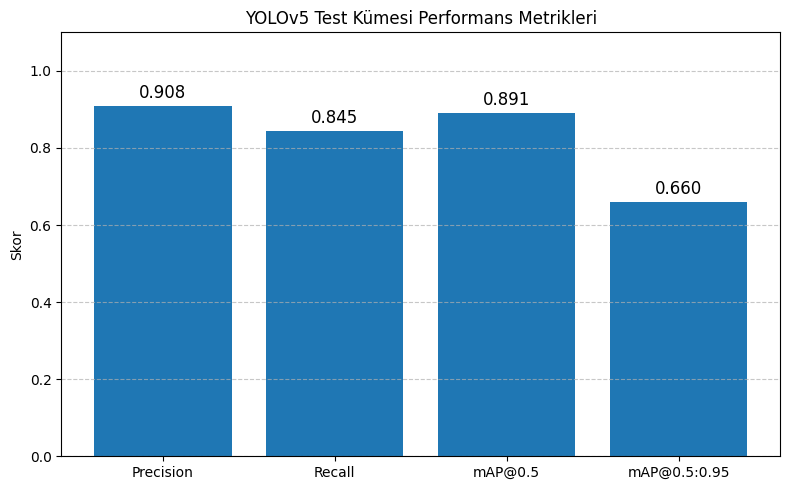

In [ ]:
import matplotlib.pyplot as plt

# Değerler
metrics = {
    "Precision": 0.908,
    "Recall": 0.845,
    "mAP@0.5": 0.891,
    "mAP@0.5:0.95": 0.660
}

# Grafik ayarları
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics.keys(), metrics.values())

# Üstlerine değer yaz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom', fontsize=12)

# Stil ayarları
plt.ylim(0, 1.1)
plt.title("YOLOv5 Test Kümesi Performans Metrikleri")
plt.ylabel("Skor")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [ ]:
!python /content/yolov5/detect.py \
  --weights /content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt \
  --source /content/drive/MyDrive/diorYOLOV5/images/test \
  --conf 0.25 \
  --save-txt \
  --save-conf \
  --project /content/drive/MyDrive/diorYOLOV5/test_predictions \
  --name yolov5_test_predictions \
  --exist-ok


detect: weights=['/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt'], source=/content/drive/MyDrive/diorYOLOV5/images/test, data=../../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/diorYOLOV5/test_predictions, name=yolov5_test_predictions, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 
Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs
image 1/2346 /content/drive/MyDrive/diorYOLOV5/images/test/00007.jpg: 640x640 6 Harbors, 155 Ships, 9.1ms
image 2/2346 /content/drive/MyDrive/diorYOLOV5/images/test/00011.jpg: 640

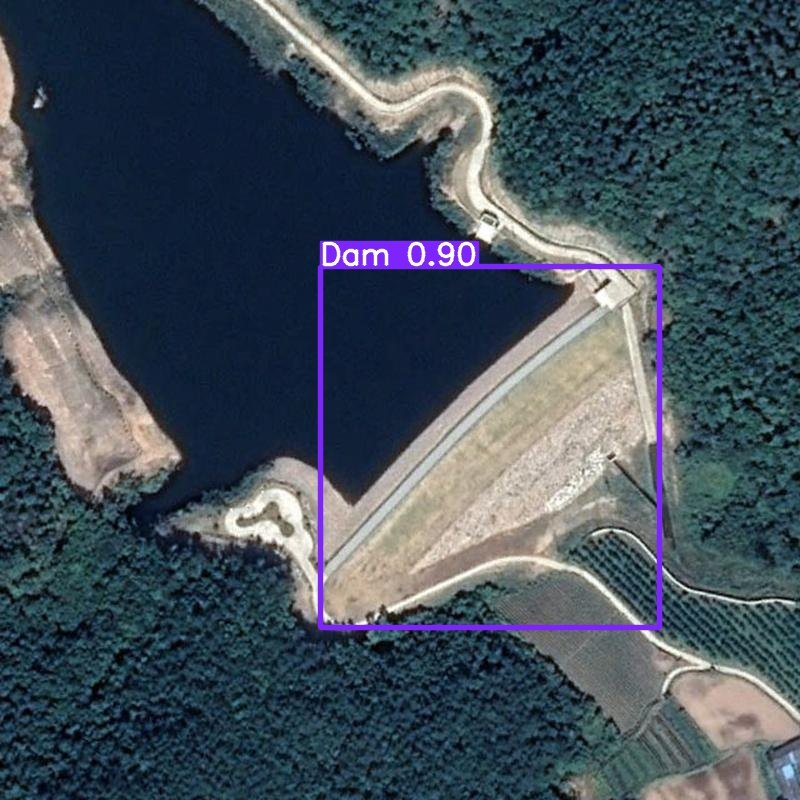

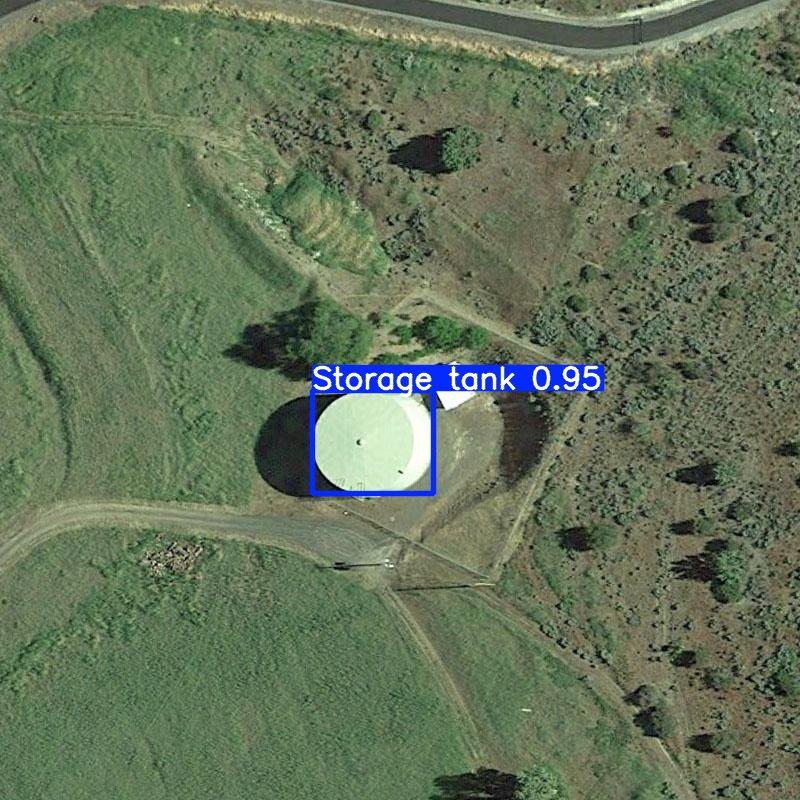

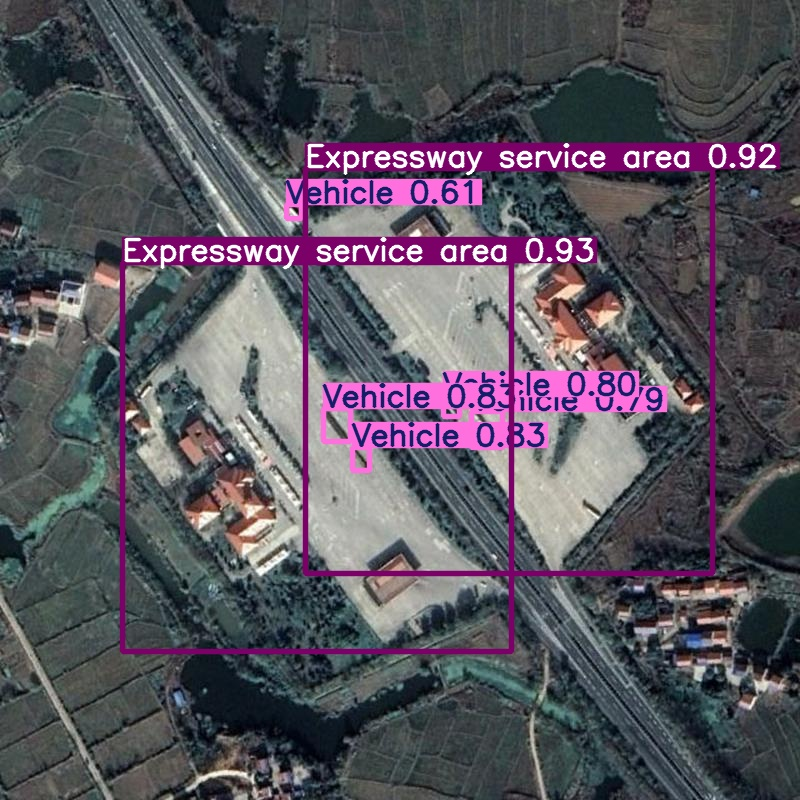

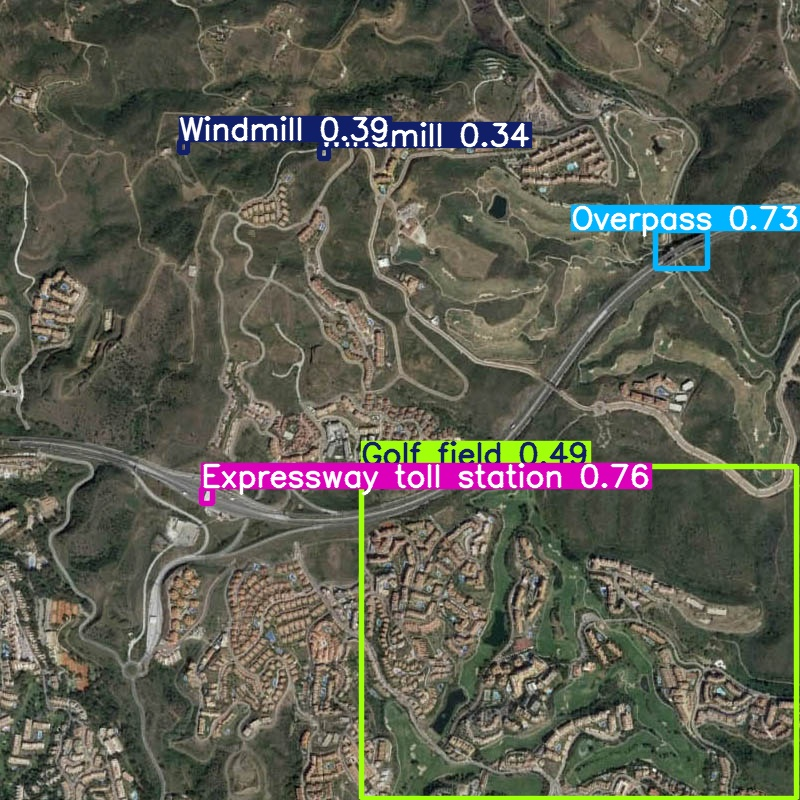

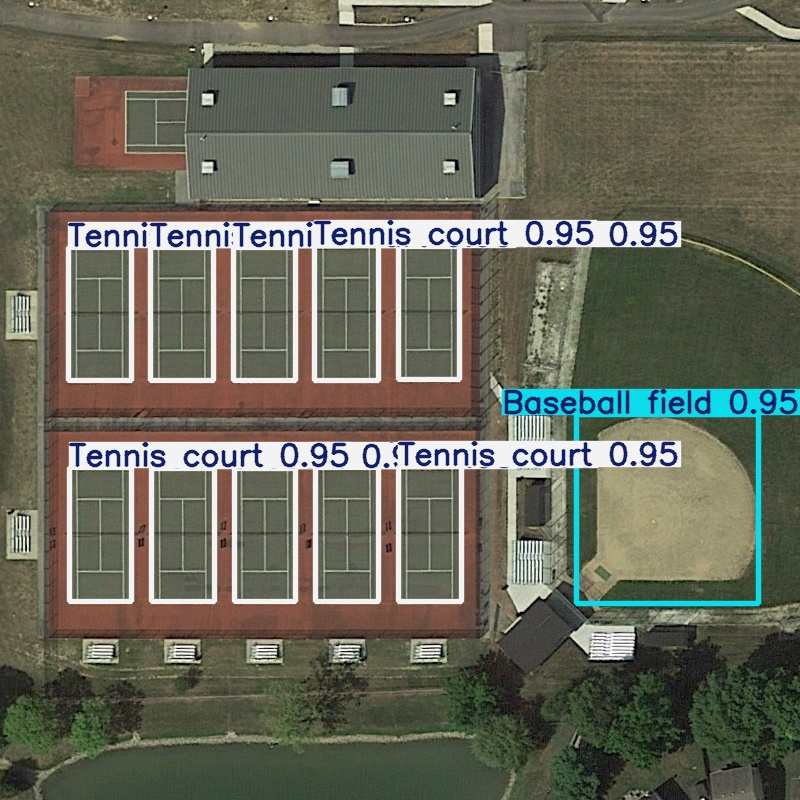

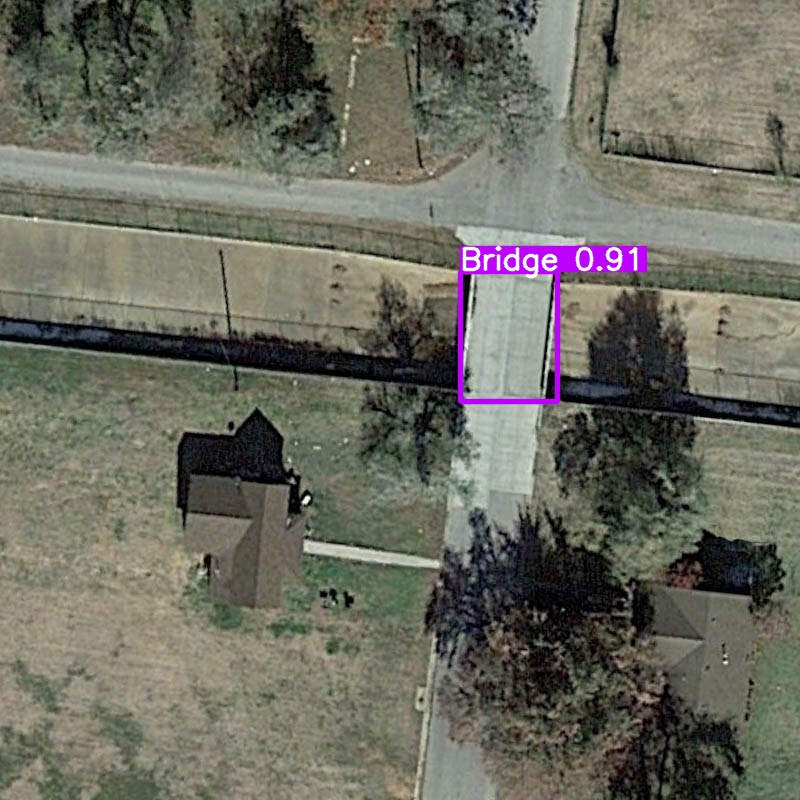

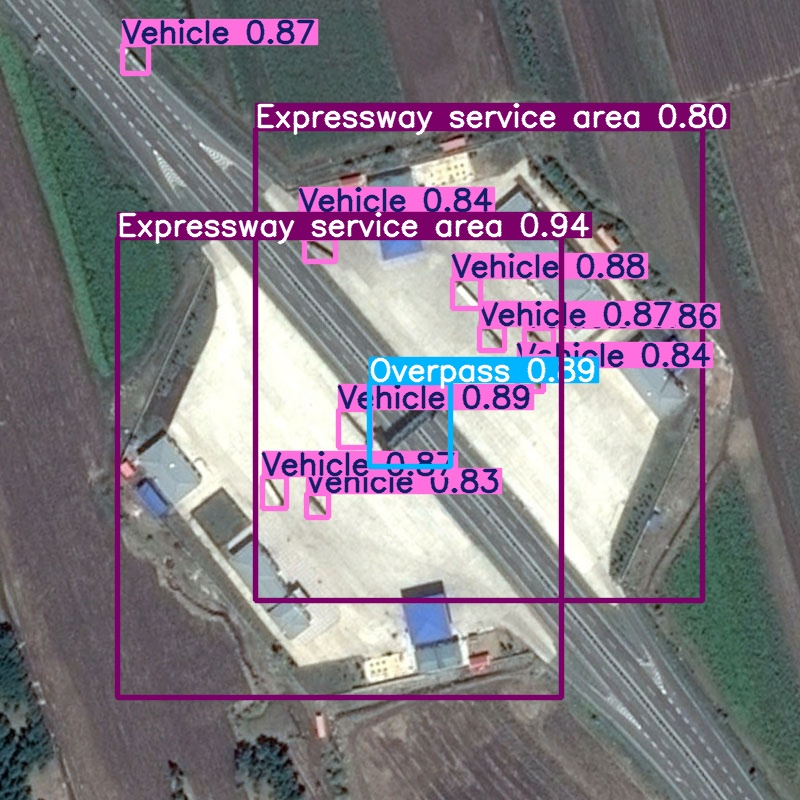

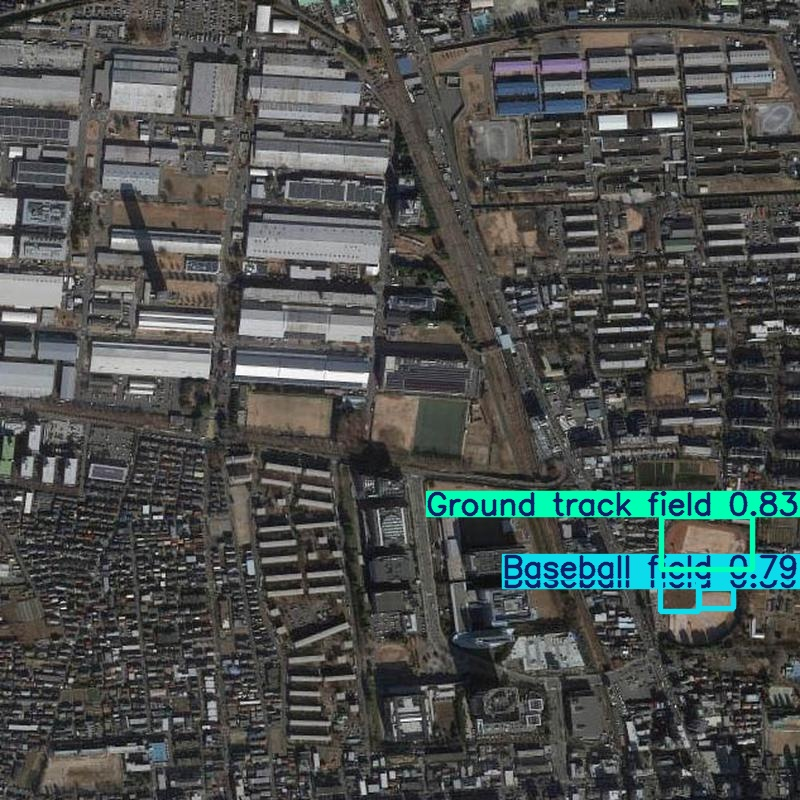

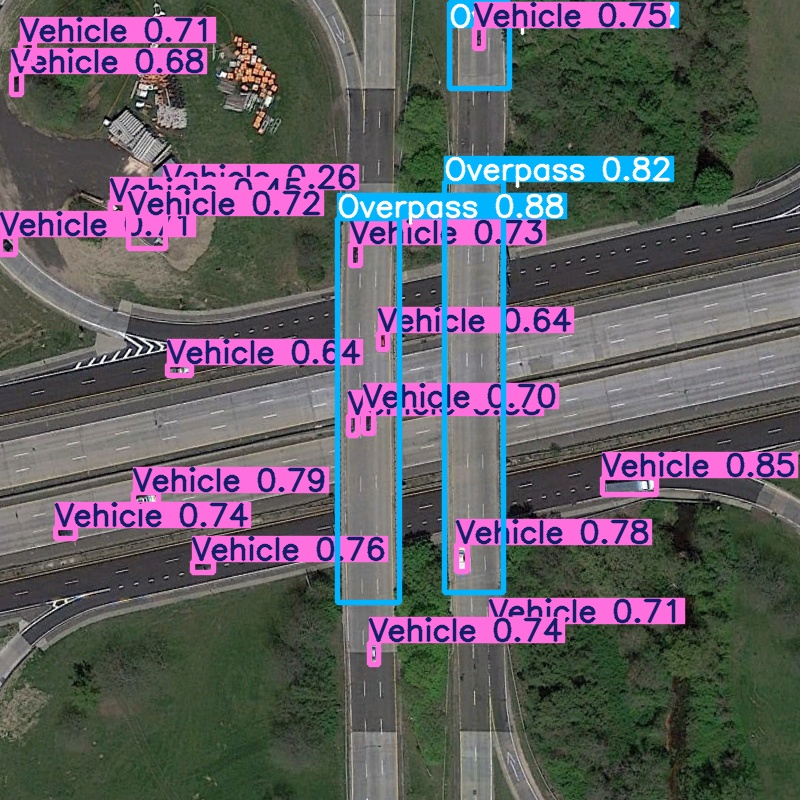

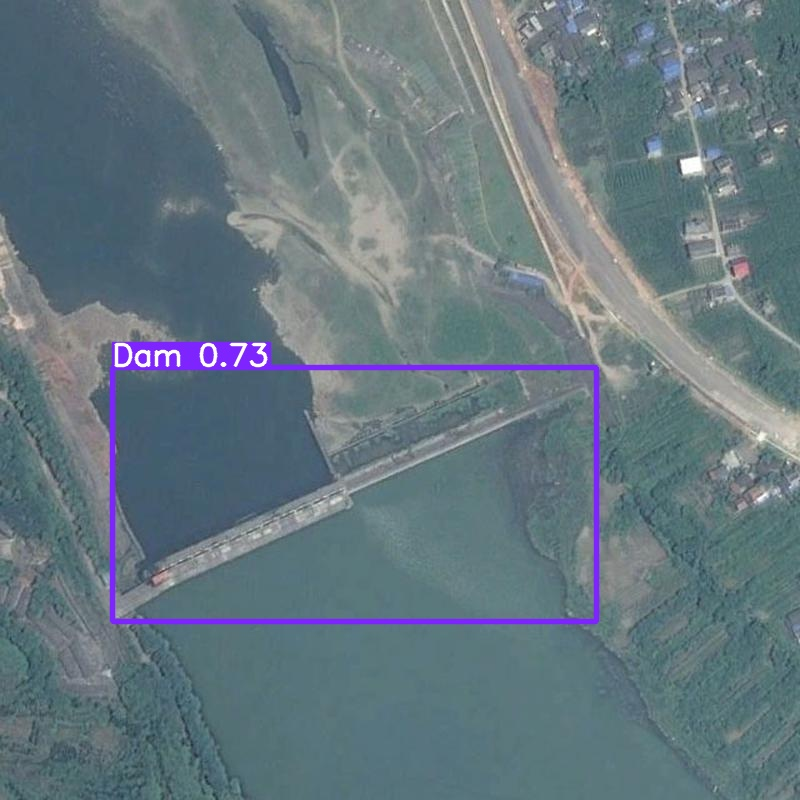

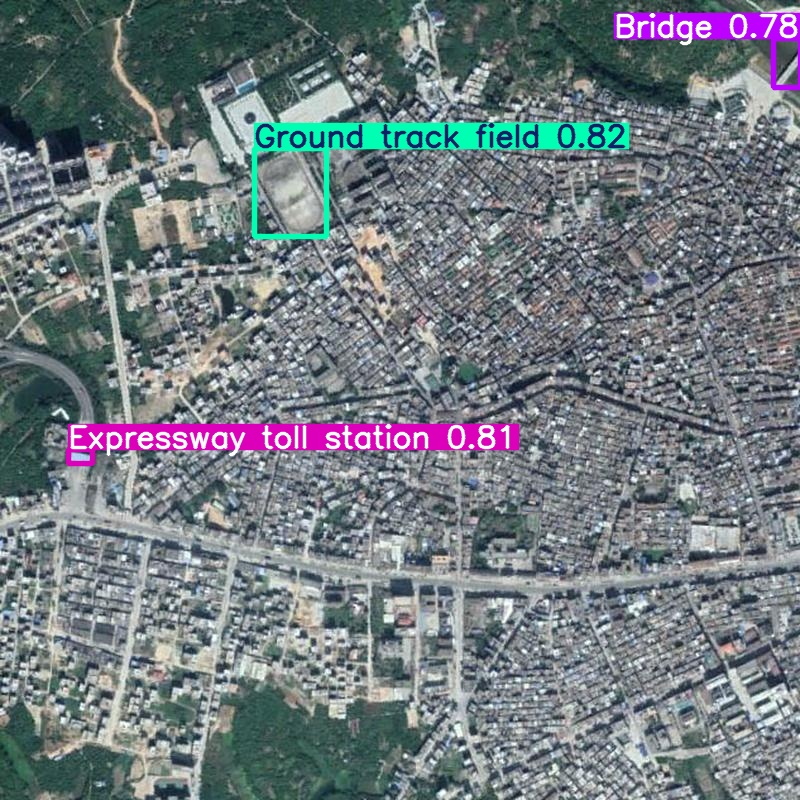

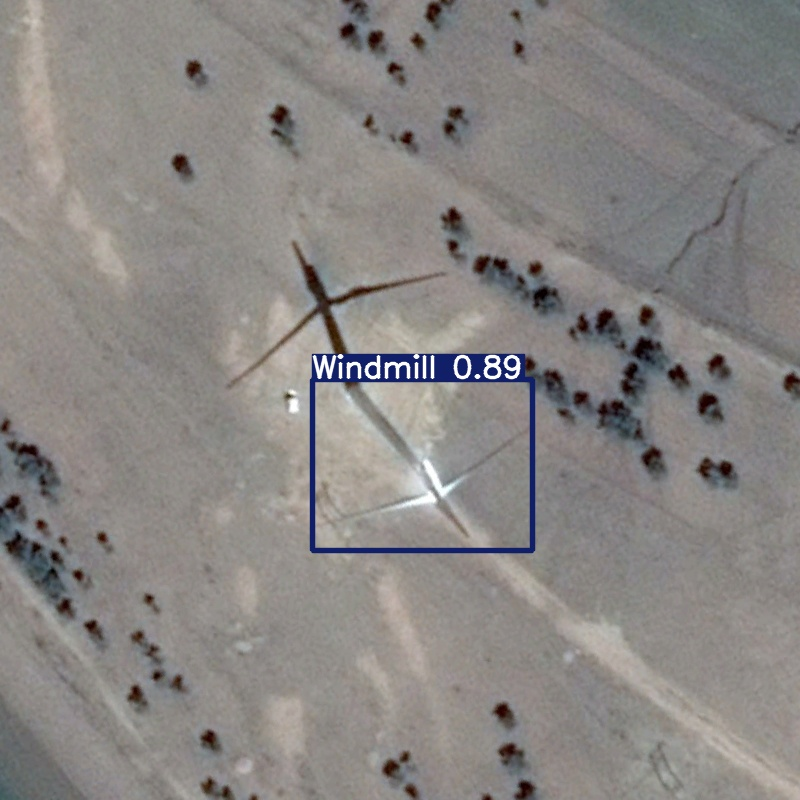

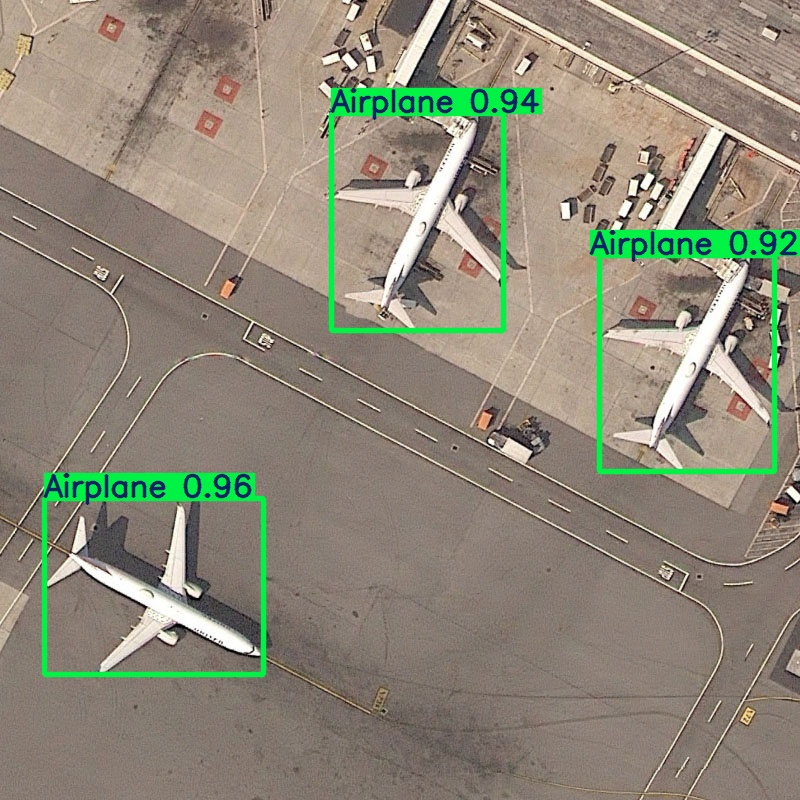

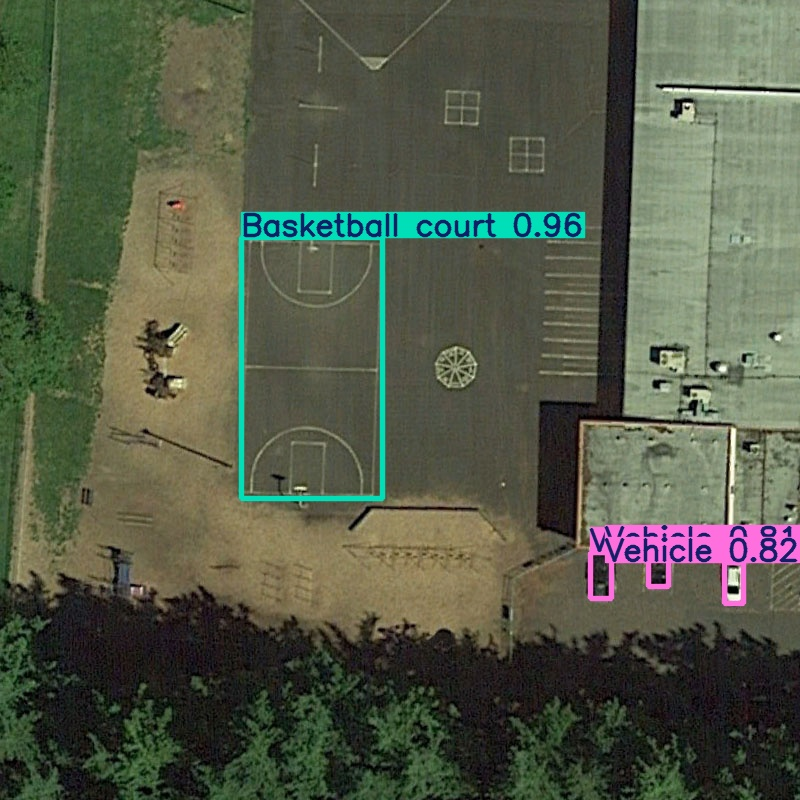

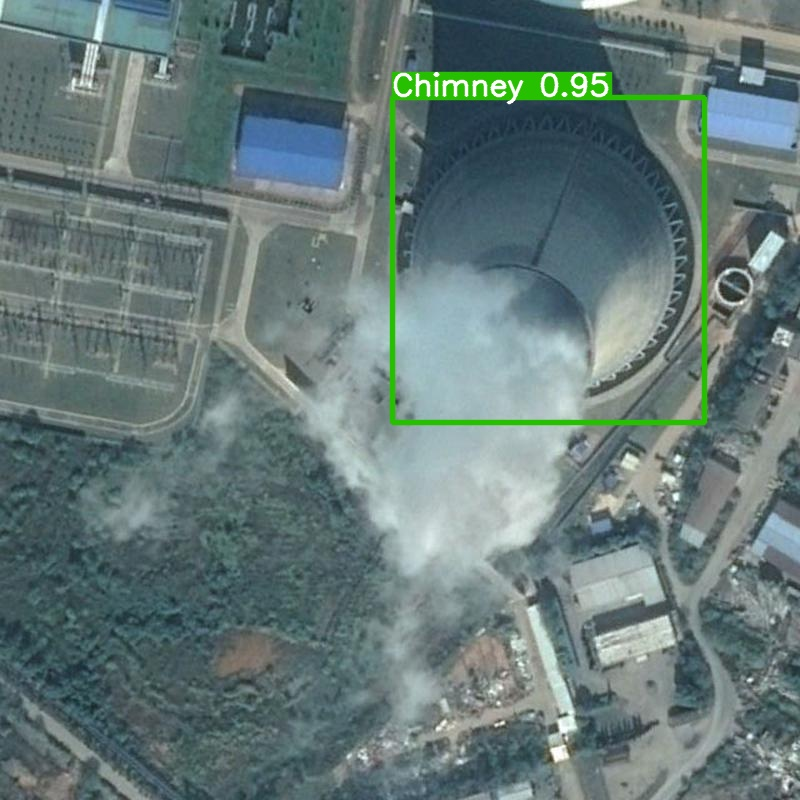

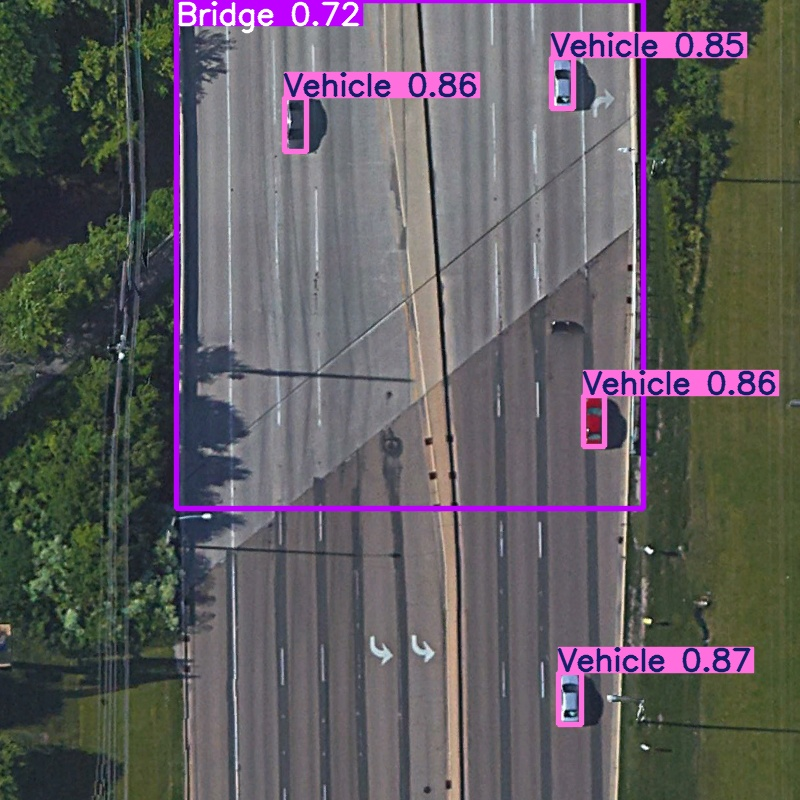

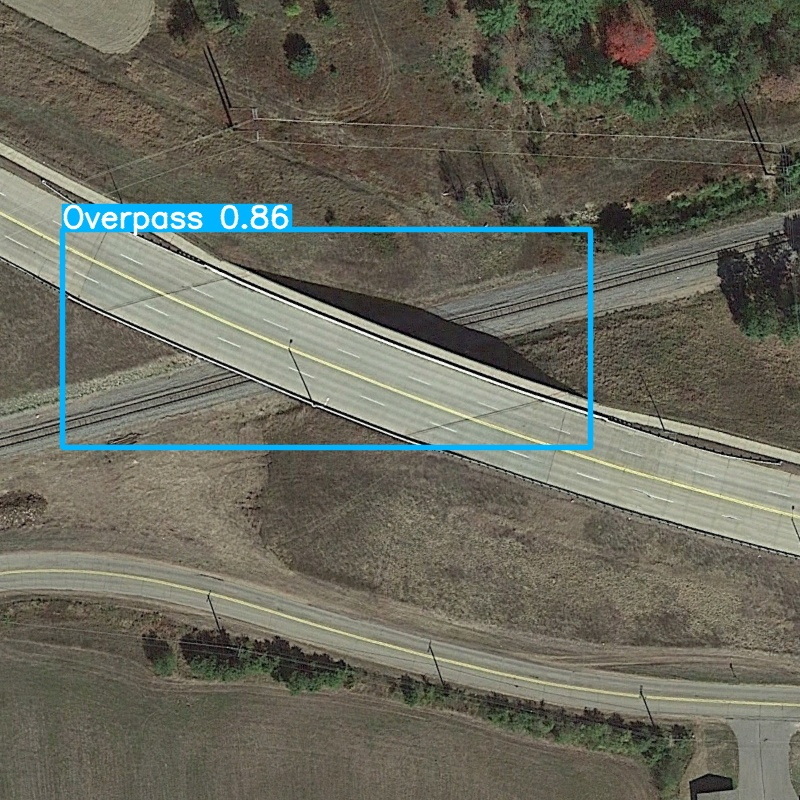

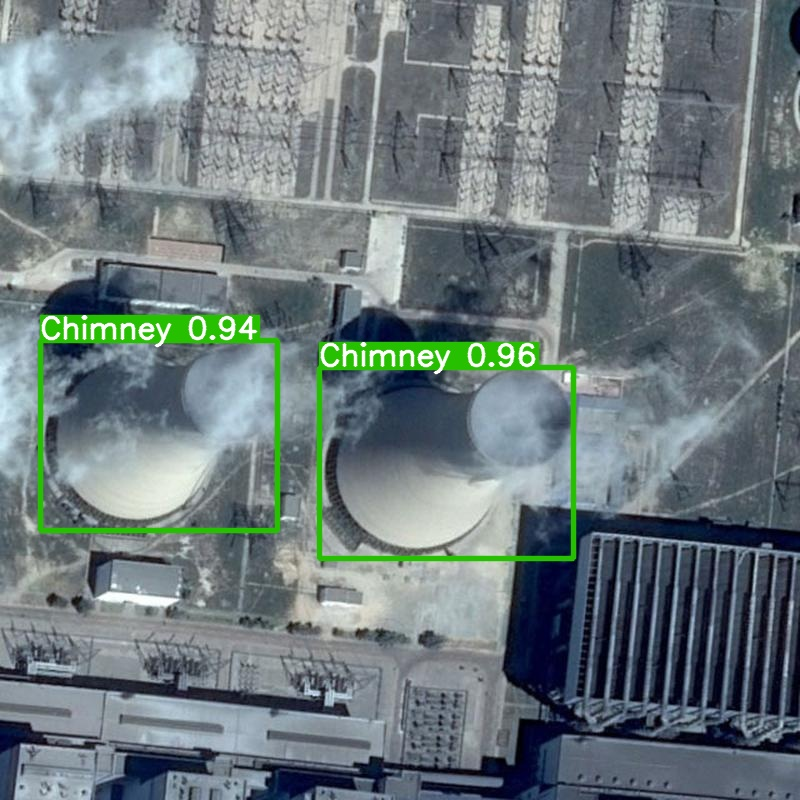

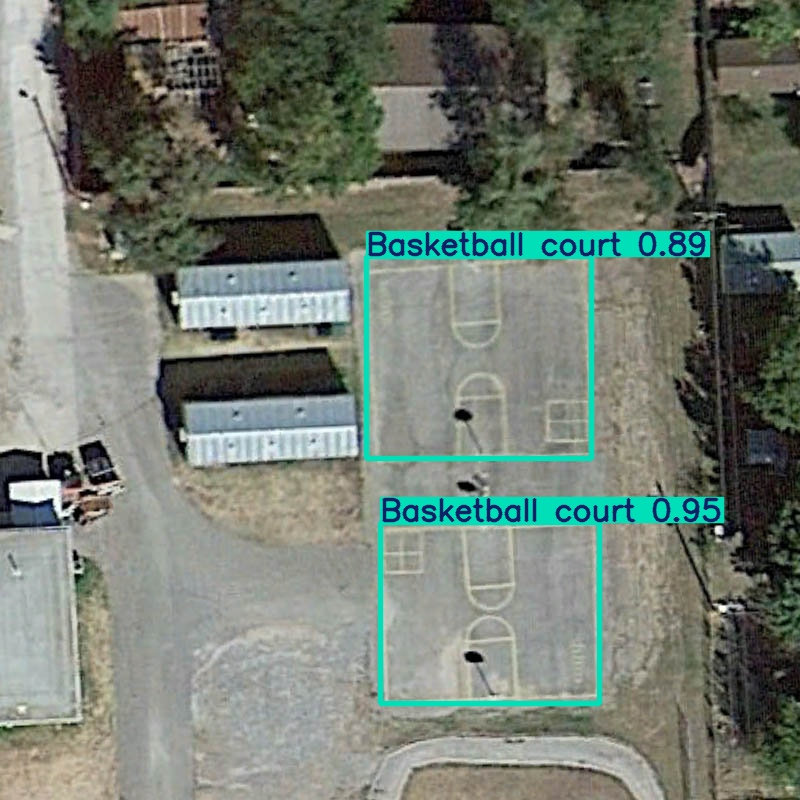

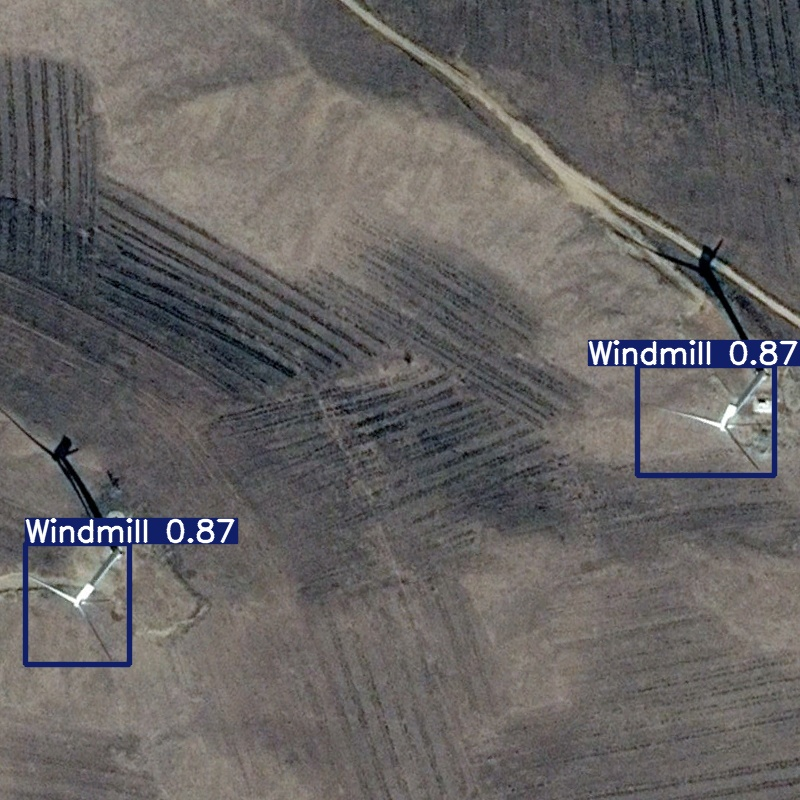

In [ ]:
import os
import random
from IPython.display import Image, display

# 📁 Tahminli görsellerin bulunduğu klasör
folder_path = "/content/drive/MyDrive/diorYOLOV5/test_predictions/yolov5_test_predictions"

# Görselleri al
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]

# Rastgele 20 görsel seç
random.seed(42)
selected = random.sample(image_files, min(20, len(image_files)))

# Göster
for img_file in selected:
    display(Image(filename=os.path.join(folder_path, img_file)))


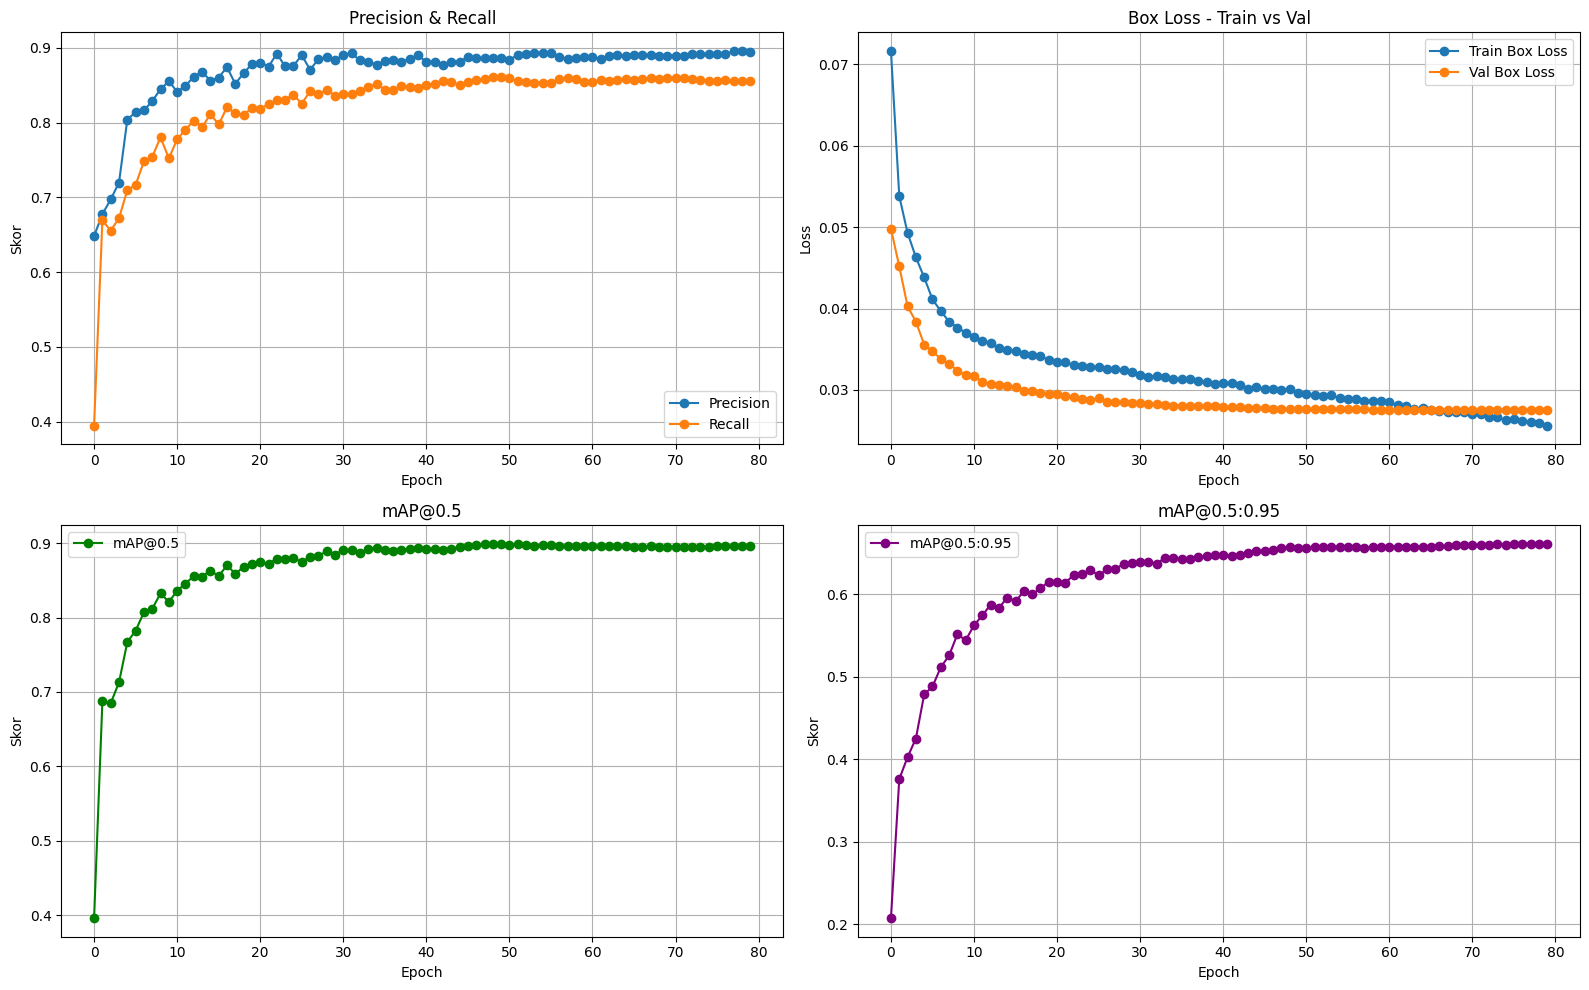

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV yolu
csv_path = "/content/drive/MyDrive/diorYOLOV5/yolov5m_train/results.csv"

# CSV dosyasını oku ve sütun adlarındaki boşlukları temizle
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # boşluklardan kurtul

# Grafik çizimi
plt.figure(figsize=(16, 10))

# 🎯 1. Precision & Recall
plt.subplot(2, 2, 1)
plt.plot(df['epoch'], df['metrics/precision'], label='Precision', marker='o')
plt.plot(df['epoch'], df['metrics/recall'], label='Recall', marker='o')
plt.title("Precision & Recall")
plt.xlabel("Epoch")
plt.ylabel("Skor")
plt.grid(True)
plt.legend()

# 🎯 2. Box Loss (Train & Val)
plt.subplot(2, 2, 2)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', marker='o')
plt.title("Box Loss - Train vs Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# 🎯 3. mAP@0.5
plt.subplot(2, 2, 3)
plt.plot(df['epoch'], df['metrics/mAP_0.5'], label='mAP@0.5', color='green', marker='o')
plt.title("mAP@0.5")
plt.xlabel("Epoch")
plt.ylabel("Skor")
plt.grid(True)
plt.legend()

# 🎯 4. mAP@0.5:0.95
plt.subplot(2, 2, 4)
plt.plot(df['epoch'], df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95', color='purple', marker='o')
plt.title("mAP@0.5:0.95")
plt.xlabel("Epoch")
plt.ylabel("Skor")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-0doxsola
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-0doxsola
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 781dbc0d16ffa95b6d18b96b7b829840a82d93d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=43670 sha256=4557ca260d9dbf45fc3da33f9754e7313ab0a96a861a0596b95627dd28d7e931
  Stored in directory: /tmp/pip-ephem-wheel-cache-lsicdl6x/wheels/a0/4d/c8/0502c44e32030c99ffab1b98075308a1ef9829c1835537afc6
Successfully built grad-cam


In [ ]:
%cd yolov5
!pip install -r requirements.txt

[Errno 2] No such file or directory: 'yolov5'
/content
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
pip install -q grad-cam==1.4.6


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git



Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 17493 (delta 2), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17493/17493), 16.59 MiB | 30.61 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.


In [ ]:
%cd yolov5
!pip install -r requirements.txt


/content/yolov5


In [ ]:
import sys
sys.path.append('/content/yolov5')  ## yolov5 klasörünü path'e ekle

In [ ]:
!ls /content/yolov5

benchmarks.py	 data	     LICENSE	     README.zh-CN.md   tutorial.ipynb
CITATION.cff	 detect.py   models	     requirements.txt  utils
classify	 export.py   pyproject.toml  segment	       val.py
CONTRIBUTING.md  hubconf.py  README.md	     train.py


In [ ]:
## YOLOv5 klasörünü klonla
!git clone https://github.com/ultralytics/yolov5.git

## Bağımlılıkları yükle
%cd yolov5
!pip install -r requirements.txt

## Yol ayarını yap
import sys
sys.path.append('/content/yolov5')  ## yolov5 klasörünü path'e ekle

## Fonksiyonu içe aktar
from utils.general import non_max_suppression  ## DÜZELTİLMİŞ import

Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 17493 (delta 2), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17493/17493), 16.54 MiB | 31.25 MiB/s, done.
Resolving deltas: 100% (11990/11990), done.
/content/yolov5/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# ==== AYARLAR ====
IMG_SIZE = 640
BATCH_SIZE = 16
DEVICE_ID = '0'
OUTPUT_DIR = "/content/drive/MyDrive/diorYOLOV5/HEATMAPCOKUZGUNUM"
IMG_DIR = "/content/drive/MyDrive/diorYOLOV5/images/test"
MODEL_PATH = "/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt"

# ==== YOLOv5 KODLARINI EKLE (ilk kez çalıştırıyorsan) ====
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -r requirements.txt

# ==== KÜTÜPHANE IMPORTLARI ====
from glob import glob
import os
import cv2
import torch
import numpy as np
from torch import nn
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from models.common import DetectMultiBackend
from utils.general import non_max_suppression
from utils.torch_utils import select_device

# ==== MODELİ YÜKLE ====
DEVICE = select_device(DEVICE_ID if torch.cuda.is_available() else '', batch_size=BATCH_SIZE)
backend = DetectMultiBackend(MODEL_PATH, device=DEVICE)
model = backend.model
model.eval()
model.zero_grad()

for p in model.parameters():
    p.requires_grad = True

# ==== WRAPPER VE TARGET SINIFLARI ====
class YoloOutputWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    def forward(self, x):
        pred = self.model(x)
        return pred[0] if isinstance(pred, tuple) else pred

class YoloClassActivationTarget:
    def __init__(self, cls_id):
        self.cls_id = cls_id
    def __call__(self, model_output):
        out = model_output.reshape(model_output.shape[0], -1, model_output.shape[-1])
        cls_conf = out[..., 5 + self.cls_id]
        return cls_conf.mean()

# ==== GradCAM OLUŞTUR ====
wrapper = YoloOutputWrapper(model)
target_layers = [model.model[22]]  # Katman tercihini istersen değiştir
cam = GradCAM(model=wrapper, target_layers=target_layers)

# ==== KLASÖR OLUŞTUR ====
HEAT_OUTPUT_DIR = os.path.join(OUTPUT_DIR, f'L22_HEAT_GRADCAM')
os.makedirs(os.path.join(HEAT_OUTPUT_DIR, 'images'), exist_ok=True)

# ==== İLK 100 GÖRSELİ DÖN ====
img_paths = sorted(glob(os.path.join(IMG_DIR, "*.*")))[:100]

for p in img_paths:
    name = os.path.basename(p)
    img = cv2.imread(p)
    if img is None:
        print(f"⚠️ {name} okunamadı, atlandı.")
        continue

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    small = cv2.resize(rgb, (IMG_SIZE, IMG_SIZE))
    norm = small.astype(np.float32) / 255.0

    t = torch.from_numpy(norm).permute(2, 0, 1).unsqueeze(0).to(DEVICE)
    t.requires_grad_()

    # TAHMİN YAP
    with torch.no_grad():
        pred = wrapper(t)
    dets = non_max_suppression(pred.unsqueeze(0), 0.25, 0.45)[0]

    if dets is None or len(dets) == 0:
        print(f"⛔ {name} içinde tespit yok, atlanıyor.")
        continue

    # 🔥 Görseldeki TÜM SINIFLARI hedefle (birleştirilmiş CAM için)
    class_ids = dets[:, -1].unique().int().tolist()
    targets = [YoloClassActivationTarget(cls) for cls in class_ids]

    # GradCAM üret (birleştirilmiş)
    gmap = cam(input_tensor=t, targets=targets)[0]
    gm = gmap[0] if gmap.ndim == 3 else gmap
    gm_resized = cv2.resize(gm, (IMG_SIZE, IMG_SIZE))
    gm_norm = (gm_resized - gm_resized.min()) / (gm_resized.max() - gm_resized.min() + 1e-8)

    heat = show_cam_on_image(norm, gm_norm, use_rgb=True)
    heat_full = cv2.resize(heat, (img.shape[1], img.shape[0]))

    # KAYDET
    cv2.imwrite(os.path.join(HEAT_OUTPUT_DIR, 'images', name), cv2.cvtColor(heat_full, cv2.COLOR_RGB2BGR))
    print(f"✅ {name} → tüm sınıflar için birleşik GradCAM kaydedildi.")

print("🎯 İlk 100 görsel için birleşik GradCAM işlemi tamamlandı.")



fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5/yolov5/yolov5


YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 
Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs


✅ 00007.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00011.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00042.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00055.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00075.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00077.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00081.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00092.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00093.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00108.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00115.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00118.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00125.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00133.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00144.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00148.jpg → tüm sınıflar için birleşik GradCAM kaydedildi.
✅ 00160.jpg → tüm sınıfl

In [ ]:
import os
import sys
import glob
import cv2
import torch
import numpy as np
from torch import nn

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from utils.general import non_max_suppression  ## DÜZELTİLMİŞ import

In [ ]:
# ----------- SETTINGS -------------
YOLO_ROOT = "/content/yolov5"
IMG_DIR = "/content/drive/MyDrive/diorYOLOV5/images/test"
MODEL_PATH = "/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt"
OUTPUT_DIR = "/content/drive/MyDrive/diorYOLOV5/heatmaps3"
IMG_SIZE = 640
LAYER_INDEX = 22
BATCH_SIZE = 16
DEVICE_ID = '0'

In [ ]:
YOLO_ROOT = "/content/yolov5"
IMG_DIR = "/content/drive/MyDrive/diorYOLOV5/images/test"
MODEL_PATH = "/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt"
OUTPUT_DIR = "/content/drive/MyDrive/diorYOLOV5/heatmaps3+"
IMG_SIZE = 640
LAYER_INDEX = 22
BATCH_SIZE = 16
DEVICE_ID = '0'

In [ ]:
# Setup YOLOv5
sys.path.insert(0, YOLO_ROOT)
from models.common import DetectMultiBackend
from utils.torch_utils import select_device

In [ ]:
YOLO_ROOT = "/content/yolov5"
IMG_DIR = "/content/drive/MyDrive/diorYOLOV5/images/test"
MODEL_PATH = "/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt"
OUTPUT_DIR = "/content/drive/MyDrive/diorYOLOV5/heatmaps3EIGEN"
IMG_SIZE = 640
LAYER_INDEX = 9
BATCH_SIZE = 16
DEVICE_ID = '0'

In [ ]:
# Setup YOLOv5
sys.path.insert(0, YOLO_ROOT)
from models.common import DetectMultiBackend
from utils.torch_utils import select_device

In [ ]:
from pytorch_grad_cam import EigenCAM  # Üstte import etmeyi unutma

# Aynı model yükleme ve hazırlama adımları
DEVICE = select_device(DEVICE_ID if torch.cuda.is_available() else '', batch_size=BATCH_SIZE)
backend = DetectMultiBackend(MODEL_PATH, device=DEVICE)
model = backend.model
model.eval()
for p in model.parameters():
    p.requires_grad = True

class YoloOutputWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    def forward(self, x):
        pred = self.model(x)
        return pred[0] if isinstance(pred, tuple) else pred

class YoloClassActivationTarget:
    def __init__(self, cls_id):
        self.cls_id = cls_id
    def __call__(self, model_output):
        out = model_output.reshape(model_output.shape[0], -1, model_output.shape[-1])
        cls_conf = out[..., 5 + self.cls_id]
        return cls_conf.mean()

# 👇 EigenCAM kullanıyoruz
wrapper = YoloOutputWrapper(model)
target_layers = [model.model[LAYER_INDEX]]
cam = EigenCAM(model=wrapper, target_layers=target_layers)

# Çıktı klasörleri
HEAT_OUTPUT_DIR = os.path.join(OUTPUT_DIR, f'L{LAYER_INDEX}_HEAT_EIGENCAM')
os.makedirs(os.path.join(HEAT_OUTPUT_DIR, 'images'), exist_ok=True)

img_paths = sorted(glob.glob(os.path.join(IMG_DIR, "*.*")))

for p in img_paths:
    name = os.path.basename(p)
    img = cv2.imread(p)
    if img is None:
        print(f"Warning: Could not read image {name}. Skipping.")
        continue

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    small = cv2.resize(rgb, (IMG_SIZE, IMG_SIZE))
    norm = small.astype(np.float32) / 255.0
    t = torch.from_numpy(norm).permute(2, 0, 1).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        pred = wrapper(t)
    dets = non_max_suppression(pred.unsqueeze(0), 0.25, 0.45)[0]

    if dets is None or len(dets) == 0:
        print(f"No detections for {name}. Skipping heatmap generation.")
        continue

    acc = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.float32)
    for det in dets.cpu().numpy():
        cls = int(det[5])
        target_fn = YoloClassActivationTarget(cls)
        gmap = cam(input_tensor=t, targets=[target_fn])[0]
        gm = gmap[0] if gmap.ndim == 3 else gmap
        gm_resized = cv2.resize(gm, (IMG_SIZE, IMG_SIZE))
        gm_norm = (gm_resized - gm_resized.min()) / (gm_resized.max() - gm_resized.min() + 1e-8)
        acc += gm_norm

    avg_gm = acc / len(dets)

    heat = show_cam_on_image(norm, avg_gm, use_rgb=True)
    heat_full = cv2.resize(heat, (img.shape[1], img.shape[0]))
    cv2.imwrite(os.path.join(HEAT_OUTPUT_DIR, 'images', name), cv2.cvtColor(heat_full, cv2.COLOR_RGB2BGR))
    print(f"Generated and saved EigenCAM heatmap for {name}")

print('✅ EigenCAM heatmaps saved to:', HEAT_OUTPUT_DIR)


YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 
Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs


Generated and saved EigenCAM heatmap for 00007.jpg
Generated and saved EigenCAM heatmap for 00011.jpg
Generated and saved EigenCAM heatmap for 00042.jpg
Generated and saved EigenCAM heatmap for 00055.jpg
Generated and saved EigenCAM heatmap for 00075.jpg
Generated and saved EigenCAM heatmap for 00077.jpg
Generated and saved EigenCAM heatmap for 00081.jpg
Generated and saved EigenCAM heatmap for 00092.jpg
Generated and saved EigenCAM heatmap for 00093.jpg
Generated and saved EigenCAM heatmap for 00108.jpg
Generated and saved EigenCAM heatmap for 00115.jpg
Generated and saved EigenCAM heatmap for 00118.jpg
Generated and saved EigenCAM heatmap for 00125.jpg
Generated and saved EigenCAM heatmap for 00133.jpg
Generated and saved EigenCAM heatmap for 00144.jpg
Generated and saved EigenCAM heatmap for 00148.jpg
Generated and saved EigenCAM heatmap for 00160.jpg
Generated and saved EigenCAM heatmap for 00169.jpg
Generated and saved EigenCAM heatmap for 00195.jpg
Generated and saved EigenCAM he

In [ ]:
!pip install -q git+https://github.com/jacobgil/pytorch-grad-cam.git


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 17483 (delta 77), reused 29 (delta 29), pack-reused 17378 (from 4)
Receiving objects: 100% (17483/17483), 16.35 MiB | 18.28 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.


In [ ]:
%cd yolov5
%pip install -r requirements.txt


/content/yolov5/yolov5


In [ ]:
import sys
sys.path.insert(0, '/content/yolov5')


In [ ]:
!ls /content/yolov5


benchmarks.py	 data	     LICENSE	     README.zh-CN.md   tutorial.ipynb
CITATION.cff	 detect.py   models	     requirements.txt  utils
classify	 export.py   pyproject.toml  segment	       val.py
CONTRIBUTING.md  hubconf.py  README.md	     train.py


In [ ]:
# ==== AYARLAR ====
IMG_SIZE = 640
BATCH_SIZE = 16
DEVICE_ID = '0'
OUTPUT_DIR = "/content/drive/MyDrive/diorYOLOV5/HEATMAPp"
IMG_DIR = "/content/drive/MyDrive/diorYOLOV5/images/test"
MODEL_PATH = "/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt"
# ==== YOLOv5 KODLARINI EKLE (ilk kez çalıştırıyorsan) ====
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -r requirements.txt




# ==== KÜTÜPHANE IMPORTLARI ====
from glob import glob
import os
import cv2
import torch
import numpy as np
from torch import nn
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from models.common import DetectMultiBackend
from utils.general import non_max_suppression
from utils.torch_utils import select_device

# ==== MODELİ YÜKLE ====
DEVICE = select_device(DEVICE_ID if torch.cuda.is_available() else '', batch_size=BATCH_SIZE)
backend = DetectMultiBackend(MODEL_PATH, device=DEVICE)
model = backend.model
model.eval()
model.zero_grad()  # ⚠️ CAM için önemli

for p in model.parameters():
    p.requires_grad = True

# ==== WRAPPER VE TARGET ====
class YoloOutputWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    def forward(self, x):
        pred = self.model(x)
        return pred[0] if isinstance(pred, tuple) else pred

class YoloClassActivationTarget:
    def __init__(self, cls_id):
        self.cls_id = cls_id
    def __call__(self, model_output):
        out = model_output.reshape(model_output.shape[0], -1, model_output.shape[-1])
        cls_conf = out[..., 5 + self.cls_id]
        return cls_conf.mean()

wrapper = YoloOutputWrapper(model)
target_layers = [model.model[22]]  # Layer seçimini değiştirebilirsin
cam = GradCAM(model=wrapper, target_layers=target_layers)

# ==== KLASÖR HAZIRLA ====
HEAT_OUTPUT_DIR = os.path.join(OUTPUT_DIR, f'L22_HEAT_GRADCAM')
os.makedirs(os.path.join(HEAT_OUTPUT_DIR, 'images'), exist_ok=True)

# ==== 100 GÖRSELİ AL ====
img_paths = sorted(glob(os.path.join(IMG_DIR, "*.*")))

# ==== GÖRSELLERİ DÖN ====
for p in img_paths:
    name = os.path.basename(p)
    img = cv2.imread(p)
    if img is None:
        print(f"⚠️ {name} okunamadı, atlandı.")
        continue

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    small = cv2.resize(rgb, (IMG_SIZE, IMG_SIZE))
    norm = small.astype(np.float32) / 255.0

    t = torch.from_numpy(norm).permute(2, 0, 1).unsqueeze(0).to(DEVICE)
    t.requires_grad_()

    # Tahmin
    with torch.no_grad():
        pred = wrapper(t)
    dets = non_max_suppression(pred.unsqueeze(0), 0.25, 0.45)[0]

    if dets is None or len(dets) == 0:
        print(f"⛔ {name} içinde tespit yok, atlanıyor.")
        continue

    # İlk tespitin sınıfı
    cls = int(dets[0, -1])
    target_fn = YoloClassActivationTarget(cls)

    # CAM üret
    gmap = cam(input_tensor=t, targets=[target_fn])[0]
    gm = gmap[0] if gmap.ndim == 3 else gmap
    gm_resized = cv2.resize(gm, (IMG_SIZE, IMG_SIZE))
    gm_norm = (gm_resized - gm_resized.min()) / (gm_resized.max() - gm_resized.min() + 1e-8)

    heat = show_cam_on_image(norm, gm_norm, use_rgb=True)
    heat_full = cv2.resize(heat, (img.shape[1], img.shape[0]))

    cv2.imwrite(os.path.join(HEAT_OUTPUT_DIR, 'images', name), cv2.cvtColor(heat_full, cv2.COLOR_RGB2BGR))
    print(f"✅ {name} için GradCAM kaydedildi.")

print('🎯 GradCAM işlemi tamamlandı. Klasör:', HEAT_OUTPUT_DIR)


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 
Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs


✅ 00007.jpg için GradCAM kaydedildi.
✅ 00011.jpg için GradCAM kaydedildi.
✅ 00042.jpg için GradCAM kaydedildi.
✅ 00055.jpg için GradCAM kaydedildi.
✅ 00075.jpg için GradCAM kaydedildi.
✅ 00077.jpg için GradCAM kaydedildi.
✅ 00081.jpg için GradCAM kaydedildi.
✅ 00092.jpg için GradCAM kaydedildi.
✅ 00093.jpg için GradCAM kaydedildi.
✅ 00108.jpg için GradCAM kaydedildi.
✅ 00115.jpg için GradCAM kaydedildi.
✅ 00118.jpg için GradCAM kaydedildi.
✅ 00125.jpg için GradCAM kaydedildi.
✅ 00133.jpg için GradCAM kaydedildi.
✅ 00144.jpg için GradCAM kaydedildi.
✅ 00148.jpg için GradCAM kaydedildi.
✅ 00160.jpg için GradCAM kaydedildi.
✅ 00169.jpg için GradCAM kaydedildi.
✅ 00195.jpg için GradCAM kaydedildi.
✅ 00199.jpg için GradCAM kaydedildi.
✅ 00200.jpg için GradCAM kaydedildi.
✅ 00207.jpg için GradCAM kaydedildi.
✅ 00234.jpg için GradCAM kaydedildi.
✅ 00247.jpg için GradCAM kaydedildi.
✅ 00255.jpg için GradCAM kaydedildi.
✅ 00257.jpg için GradCAM kaydedildi.
✅ 00272.jpg için GradCAM kaydedildi.
✅

KeyboardInterrupt: 

In [ ]:
# ==== AYARLAR ====
IMG_SIZE = 640
BATCH_SIZE = 16
DEVICE_ID = '0'
OUTPUT_DIR = "/content/drive/MyDrive/diorYOLOV5/HEATMAP"
IMG_DIR = "/content/drive/MyDrive/diorYOLOV5/images/test"
MODEL_PATH = "/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt"

# ==== YOLOv5 KODLARINI EKLE (ilk kez çalıştırıyorsan) ====
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -r requirements.txt

# ==== KÜTÜPHANE IMPORTLARI ====
from glob import glob
import os
import cv2
import torch
import numpy as np
from torch import nn
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image
from models.common import DetectMultiBackend
from utils.general import non_max_suppression
from utils.torch_utils import select_device

# ==== MODELİ YÜKLE ====
DEVICE = select_device(DEVICE_ID if torch.cuda.is_available() else '', batch_size=BATCH_SIZE)
backend = DetectMultiBackend(MODEL_PATH, device=DEVICE)
model = backend.model
model.eval()
model.zero_grad()

for p in model.parameters():
    p.requires_grad = True

# ==== WRAPPER VE TARGET ====
class YoloOutputWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    def forward(self, x):
        pred = self.model(x)
        return pred[0] if isinstance(pred, tuple) else pred

class YoloClassActivationTarget:
    def __init__(self, cls_id):
        self.cls_id = cls_id
    def __call__(self, model_output):
        out = model_output.reshape(model_output.shape[0], -1, model_output.shape[-1])
        cls_conf = out[..., 5 + self.cls_id]
        return cls_conf.mean()

wrapper = YoloOutputWrapper(model)
target_layers = [model.model[22]]
cam = GradCAMPlusPlus(model=wrapper, target_layers=target_layers)

# ==== KLASÖR HAZIRLA ====
HEAT_OUTPUT_DIR = os.path.join(OUTPUT_DIR, f'L22_HEAT_GRADCAMPP')
os.makedirs(os.path.join(HEAT_OUTPUT_DIR, 'images'), exist_ok=True)

# ==== 100 GÖRSELİ AL ====
img_paths = sorted(glob(os.path.join(IMG_DIR, "*.*")))

# ==== GÖRSELLERİ DÖN ====
for p in img_paths:
    name = os.path.basename(p)
    img = cv2.imread(p)
    if img is None:
        print(f"⚠️ {name} okunamadı, atlandı.")
        continue

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    small = cv2.resize(rgb, (IMG_SIZE, IMG_SIZE))
    norm = small.astype(np.float32) / 255.0

    t = torch.from_numpy(norm).permute(2, 0, 1).unsqueeze(0).to(DEVICE)
    t.requires_grad_()

    # Tahmin
    with torch.no_grad():
        pred = wrapper(t)
    dets = non_max_suppression(pred.unsqueeze(0), 0.25, 0.45)[0]

    if dets is None or len(dets) == 0:
        print(f"⛔ {name} içinde tespit yok, atlanıyor.")
        continue

    cls = int(dets[0, -1])
    target_fn = YoloClassActivationTarget(cls)

    # CAM üret
    gmap = cam(input_tensor=t, targets=[target_fn])[0]
    gm = gmap[0] if gmap.ndim == 3 else gmap
    gm_resized = cv2.resize(gm, (IMG_SIZE, IMG_SIZE))
    gm_norm = (gm_resized - gm_resized.min()) / (gm_resized.max() - gm_resized.min() + 1e-8)

    heat = show_cam_on_image(norm, gm_norm, use_rgb=True)
    heat_full = cv2.resize(heat, (img.shape[1], img.shape[0]))

    cv2.imwrite(os.path.join(HEAT_OUTPUT_DIR, 'images', name), cv2.cvtColor(heat_full, cv2.COLOR_RGB2BGR))
    print(f"✅ {name} için GradCAM++ kaydedildi.")

print('🎯 GradCAM++ işlemi tamamlandı. Klasör:', HEAT_OUTPUT_DIR)


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.53 MiB | 33.39 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.
/content/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5


YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 
Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs


✅ 00007.jpg için GradCAM++ kaydedildi.
✅ 00011.jpg için GradCAM++ kaydedildi.
✅ 00042.jpg için GradCAM++ kaydedildi.
✅ 00055.jpg için GradCAM++ kaydedildi.
✅ 00075.jpg için GradCAM++ kaydedildi.
✅ 00077.jpg için GradCAM++ kaydedildi.
✅ 00081.jpg için GradCAM++ kaydedildi.
✅ 00092.jpg için GradCAM++ kaydedildi.
✅ 00093.jpg için GradCAM++ kaydedildi.
✅ 00108.jpg için GradCAM++ kaydedildi.
✅ 00115.jpg için GradCAM++ kaydedildi.
✅ 00118.jpg için GradCAM++ kaydedildi.
✅ 00125.jpg için GradCAM++ kaydedildi.
✅ 00133.jpg için GradCAM++ kaydedildi.
✅ 00144.jpg için GradCAM++ kaydedildi.
✅ 00148.jpg için GradCAM++ kaydedildi.
✅ 00160.jpg için GradCAM++ kaydedildi.
✅ 00169.jpg için GradCAM++ kaydedildi.
✅ 00195.jpg için GradCAM++ kaydedildi.
✅ 00199.jpg için GradCAM++ kaydedildi.
✅ 00200.jpg için GradCAM++ kaydedildi.
✅ 00207.jpg için GradCAM++ kaydedildi.
✅ 00234.jpg için GradCAM++ kaydedildi.
✅ 00247.jpg için GradCAM++ kaydedildi.
✅ 00255.jpg için GradCAM++ kaydedildi.
✅ 00257.jpg için GradCAM+

In [ ]:
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, EigenCAM

cam_methods = {
    "GradCAM": GradCAM,
    "GradCAM++": GradCAMPlusPlus,
    "EigenCAM": EigenCAM
}

target_layers = [model.model[22]]  # GradCAM ve GradCAM++ için
eigen_target_layer = [model.model[9]]  # EigenCAM için farklı katman

for method_name, cam_class in cam_methods.items():
    print(f"\n🔍 {method_name} için M1 maskeleme başlıyor...")

    layer = eigen_target_layer if method_name == "EigenCAM" else target_layers
    cam = cam_class(model=wrapper, target_layers=layer)

    for p in img_paths:
        name = os.path.basename(p)
        img = cv2.imread(p)
        if img is None:
            print(f"⚠️ {name} okunamadı, atlandı.")
            continue

        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        small = cv2.resize(rgb, (IMG_SIZE, IMG_SIZE))
        norm = small.astype(np.float32) / 255.0

        t = torch.from_numpy(norm).permute(2, 0, 1).unsqueeze(0).to(DEVICE)
        t.requires_grad_()

        with torch.no_grad():
            pred = wrapper(t)
        dets = non_max_suppression(pred.unsqueeze(0), 0.25, 0.45)[0]

        if dets is None or len(dets) == 0:
            print(f"⛔ {name} içinde tespit yok, atlanıyor.")
            continue

        for i, det in enumerate(dets):
            cls = int(det[-1])
            x1, y1, x2, y2 = [int(v) for v in det[:4]]

            target_fn = YoloClassActivationTarget(cls)
            grayscale_cam = cam(input_tensor=t, targets=[target_fn])[0]

            # M1 maskeleme
            mask = np.zeros_like(grayscale_cam)
            mask[y1:y2, x1:x2] = 1.0
            masked_cam = grayscale_cam * mask

            # Normalize
            cam_min, cam_max = masked_cam.min(), masked_cam.max()
            if cam_max - cam_min > 1e-8:
                cam_norm = (masked_cam - cam_min) / (cam_max - cam_min)
            else:
                cam_norm = np.zeros_like(masked_cam)

            # CAM görseli oluştur
            heat = show_cam_on_image(norm, cam_norm, use_rgb=True)
            heat_full = cv2.resize(heat, (img.shape[1], img.shape[0]))

            save_dir = os.path.join(OUTPUT_DIR, f'{method_name}_M1')
            os.makedirs(save_dir, exist_ok=True)
            cv2.imwrite(os.path.join(save_dir, f"{name[:-4]}_det{i}_cls{cls}.jpg"), cv2.cvtColor(heat_full, cv2.COLOR_RGB2BGR))

        print(f"✅ {name} için {method_name} M1 CAM tamamlandı.")

print("\n🎯 Tüm yöntemler için M1 maskeleme tamamlandı.")



🔍 GradCAM için M1 maskeleme başlıyor...
✅ 00007.jpg için GradCAM M1 CAM tamamlandı.
✅ 00011.jpg için GradCAM M1 CAM tamamlandı.
✅ 00042.jpg için GradCAM M1 CAM tamamlandı.
✅ 00055.jpg için GradCAM M1 CAM tamamlandı.
✅ 00075.jpg için GradCAM M1 CAM tamamlandı.
✅ 00077.jpg için GradCAM M1 CAM tamamlandı.
✅ 00081.jpg için GradCAM M1 CAM tamamlandı.
✅ 00092.jpg için GradCAM M1 CAM tamamlandı.
✅ 00093.jpg için GradCAM M1 CAM tamamlandı.
✅ 00108.jpg için GradCAM M1 CAM tamamlandı.
✅ 00115.jpg için GradCAM M1 CAM tamamlandı.
✅ 00118.jpg için GradCAM M1 CAM tamamlandı.
✅ 00125.jpg için GradCAM M1 CAM tamamlandı.
✅ 00133.jpg için GradCAM M1 CAM tamamlandı.
✅ 00144.jpg için GradCAM M1 CAM tamamlandı.
✅ 00148.jpg için GradCAM M1 CAM tamamlandı.
✅ 00160.jpg için GradCAM M1 CAM tamamlandı.
✅ 00169.jpg için GradCAM M1 CAM tamamlandı.
✅ 00195.jpg için GradCAM M1 CAM tamamlandı.
✅ 00199.jpg için GradCAM M1 CAM tamamlandı.
✅ 00200.jpg için GradCAM M1 CAM tamamlandı.
✅ 00207.jpg için GradCAM M1 CAM tam

KeyboardInterrupt: 

In [ ]:
# ==================== KÜTÜPHANELER ====================
import os, glob, cv2, torch, numpy as np
from torch import nn
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, EigenCAM
from models.common import DetectMultiBackend
from utils.general import non_max_suppression
from utils.torch_utils import select_device

# ==================== YOL VE AYARLAR ====================
IMG_DIR = "/content/drive/MyDrive/diorYOLOV5/images/test"
MODEL_PATH = "/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt"
OUTPUT_DIR = "/content/drive/MyDrive/m1_maskeds_outputs"
IMG_SIZE = 640
DEVICE_ID = 0

# ==================== MODEL YÜKLE ====================
DEVICE = select_device(DEVICE_ID if torch.cuda.is_available() else '', batch_size=1)
backend = DetectMultiBackend(MODEL_PATH, device=DEVICE)
model = backend.model
model.eval()
for p in model.parameters():
    p.requires_grad = True

# ==================== WRAPPER VE TARGET ====================
class YoloOutputWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    def forward(self, x):
        pred = self.model(x)
        return pred[0] if isinstance(pred, tuple) else pred

class YoloClassActivationTarget:
    def __init__(self, cls_id):
        self.cls_id = cls_id
    def __call__(self, model_output):
        out = model_output.reshape(model_output.shape[0], -1, model_output.shape[-1])
        cls_conf = out[..., 5 + self.cls_id]
        return cls_conf.mean()

# ==================== M1 MASKELEME (KARARTMA) ====================
def apply_m1_mask_and_blackout(original_rgb: np.ndarray, cam: np.ndarray) -> np.ndarray:
    threshold = np.percentile(cam, 85)
    mask = (cam >= threshold).astype(np.uint8)
    blackout_img = original_rgb.copy()
    blackout_img[mask == 1] = 0.0
    return blackout_img

# ==================== CAM YÖNTEMLERİ ====================
wrapper = YoloOutputWrapper(model)
grad_target = [model.model[22]]   # GradCAM ve GradCAM++
eigen_target = [model.model[9]]   # EigenCAM (SPPF katmanı)

cams = {
    "grad": GradCAM(model=wrapper, target_layers=grad_target),
    "gradpp": GradCAMPlusPlus(model=wrapper, target_layers=grad_target),
    "eigen": EigenCAM(model=wrapper, target_layers=eigen_target)
}

# ==================== KLASÖR OLUŞTUR ====================
os.makedirs(os.path.join(OUTPUT_DIR, 'images'), exist_ok=True)

# ==================== GÖRSELLERİ DÖN ====================
img_paths = sorted(glob.glob(os.path.join(IMG_DIR, "*.*")))[:100]

for p in img_paths:
    name = os.path.basename(p)
    img = cv2.imread(p)
    if img is None:
        print(f"⚠️ {name} okunamadı, atlanıyor.")
        continue

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    small = cv2.resize(rgb, (IMG_SIZE, IMG_SIZE))
    norm = small.astype(np.float32) / 255.0
    t = torch.from_numpy(norm).permute(2, 0, 1).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        pred = wrapper(t)
    dets = non_max_suppression(pred.unsqueeze(0), 0.25, 0.45)[0]

    if dets is None or len(dets) == 0:
        print(f"❌ {name} için tespit yok, CAM uygulanmadı.")
        continue

    for det in dets.cpu().numpy():
        cls = int(det[5])
        target_fn = YoloClassActivationTarget(cls)

        for cam_name, cam_method in cams.items():
            gmap = cam_method(input_tensor=t, targets=[target_fn])[0]
            gm = gmap[0] if gmap.ndim == 3 else gmap
            gm_resized = cv2.resize(gm, (IMG_SIZE, IMG_SIZE))
            gm_norm = (gm_resized - gm_resized.min()) / (gm_resized.max() - gm_resized.min() + 1e-8)

            # M1 maskesi ile yüksek aktivasyonları siyah yap
            masked = apply_m1_mask_and_blackout(norm, gm_norm)
            masked_uint8 = (masked * 255).astype(np.uint8)
            masked_full = cv2.resize(masked_uint8, (img.shape[1], img.shape[0]))

            # Kaydet
            save_path = os.path.join(OUTPUT_DIR, 'images', f"m1mask_{cam_name}_{name}")
            cv2.imwrite(save_path, cv2.cvtColor(masked_full, cv2.COLOR_RGB2BGR))

    print(f"[✓] {name} için M1 maskeleri kaydedildi.")

print("🎉 İlk 100 görsel için M1 karartmalı CAM maskeleri tamamlandı.")


YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 
Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs


[✓] 00007.jpg için M1 maskeleri kaydedildi.
[✓] 00011.jpg için M1 maskeleri kaydedildi.
[✓] 00042.jpg için M1 maskeleri kaydedildi.
[✓] 00055.jpg için M1 maskeleri kaydedildi.
[✓] 00075.jpg için M1 maskeleri kaydedildi.
[✓] 00077.jpg için M1 maskeleri kaydedildi.
[✓] 00081.jpg için M1 maskeleri kaydedildi.
[✓] 00092.jpg için M1 maskeleri kaydedildi.
[✓] 00093.jpg için M1 maskeleri kaydedildi.
[✓] 00108.jpg için M1 maskeleri kaydedildi.
[✓] 00115.jpg için M1 maskeleri kaydedildi.
[✓] 00118.jpg için M1 maskeleri kaydedildi.
[✓] 00125.jpg için M1 maskeleri kaydedildi.
[✓] 00133.jpg için M1 maskeleri kaydedildi.
[✓] 00144.jpg için M1 maskeleri kaydedildi.
[✓] 00148.jpg için M1 maskeleri kaydedildi.
[✓] 00160.jpg için M1 maskeleri kaydedildi.
[✓] 00169.jpg için M1 maskeleri kaydedildi.
[✓] 00195.jpg için M1 maskeleri kaydedildi.
[✓] 00199.jpg için M1 maskeleri kaydedildi.
[✓] 00200.jpg için M1 maskeleri kaydedildi.
[✓] 00207.jpg için M1 maskeleri kaydedildi.
[✓] 00234.jpg için M1 maskeleri 

In [ ]:
# ============== GOOGLE DRIVE ==============
from google.colab import drive
drive.mount('/content/drive')

# ============== KÜTÜPHANELER ==============
import os, glob, cv2, torch, numpy as np
from torch import nn
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, EigenCAM
from models.common import DetectMultiBackend
from utils.general import non_max_suppression
from utils.torch_utils import select_device

# ============== PATH ve AYARLAR ==============
IMG_DIR = "/content/drive/MyDrive/diorYOLOV5/images/test"
MODEL_PATH = "/content/drive/MyDrive/diorYOLOV5/yolov5m_train/weights/best.pt"
OUTPUT_DIR = "/content/drive/MyDrive/m1_mask_outputs_fixed"
IMG_SIZE = 640
DEVICE_ID = 0

# ============== MODEL YÜKLE ==============
DEVICE = select_device(DEVICE_ID if torch.cuda.is_available() else '', batch_size=1)
backend = DetectMultiBackend(MODEL_PATH, device=DEVICE)
model = backend.model
model.eval()
for p in model.parameters():
    p.requires_grad = True

# ============== WRAPPER & TARGET FUNC ==============
class YoloOutputWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    def forward(self, x):
        pred = self.model(x)
        return pred[0] if isinstance(pred, tuple) else pred

class YoloClassActivationTarget:
    def __init__(self, cls_id):
        self.cls_id = cls_id
    def __call__(self, model_output):
        out = model_output.reshape(model_output.shape[0], -1, model_output.shape[-1])
        objectness = out[..., 4]
        class_conf = out[..., 5 + self.cls_id]
        return (objectness * class_conf).mean()

# ============== M1 MASKELEME ==============
def apply_m1_mask_and_blackout(original_rgb: np.ndarray, cam: np.ndarray) -> np.ndarray:
    threshold = np.percentile(cam, 85)
    mask = (cam >= threshold).astype(np.uint8)
    blackout_img = original_rgb.copy()
    blackout_img[mask == 1] = 0.0
    return blackout_img

# ============== CAM YÖNTEMLERİ ==============
wrapper = YoloOutputWrapper(model)
grad_target = [model.model[22]]   # GradCAM, GradCAM++
eigen_target = [model.model[9]]   # EigenCAM

cams = {
    "grad": GradCAM(model=wrapper, target_layers=grad_target),
    "gradpp": GradCAMPlusPlus(model=wrapper, target_layers=grad_target),
    "eigen": EigenCAM(model=wrapper, target_layers=eigen_target)
}

# ============== KLASÖRLER ==============
os.makedirs(os.path.join(OUTPUT_DIR, 'images'), exist_ok=True)

# ============== İŞLEM DÖNGÜSÜ ==============
img_paths = sorted(glob.glob(os.path.join(IMG_DIR, "*.*")))[:100]

for p in img_paths:
    name = os.path.basename(p)
    img = cv2.imread(p)
    if img is None:
        print(f"⚠️ {name} okunamadı, atlanıyor.")
        continue

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    small = cv2.resize(rgb, (IMG_SIZE, IMG_SIZE))
    norm = small.astype(np.float32) / 255.0
    t = torch.from_numpy(norm).permute(2, 0, 1).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        pred = wrapper(t)
    dets = non_max_suppression(pred.unsqueeze(0), 0.25, 0.45)[0]

    if dets is None or len(dets) == 0:
        print(f"❌ {name} için tespit yok, CAM uygulanmadı.")
        continue

    for det in dets.cpu().numpy():
        cls = int(det[5])
        target_fn = YoloClassActivationTarget(cls)

        for cam_name, cam_method in cams.items():
            gmap = cam_method(input_tensor=t, targets=[target_fn])[0]
            gm = gmap[0] if gmap.ndim == 3 else gmap
            gm_resized = cv2.resize(gm, (IMG_SIZE, IMG_SIZE))
            gm_norm = (gm_resized - gm_resized.min()) / (gm_resized.max() - gm_resized.min() + 1e-8)

            # M1 uygulama: yüksek aktivasyonlu yerleri karart
            masked = apply_m1_mask_and_blackout(norm, gm_norm)
            masked_uint8 = (masked * 255).astype(np.uint8)
            masked_full = cv2.resize(masked_uint8, (img.shape[1], img.shape[0]))

            save_path = os.path.join(OUTPUT_DIR, 'images', f"m1mask_{cam_name}_{name}")
            cv2.imwrite(save_path, cv2.cvtColor(masked_full, cv2.COLOR_RGB2BGR))

    print(f"[✓] {name} için tüm CAM'ler M1 maskeyle kaydedildi.")

print("✅ Tüm görseller için işlem tamamlandı.")


YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs


[✓] 00007.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00011.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00042.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00055.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00075.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00077.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00081.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00092.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00093.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00108.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00115.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00118.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00125.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00133.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00144.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00148.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00160.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00169.jpg için tüm CAM'ler M1 maskeyle kaydedildi.
[✓] 00195.

In [ ]:
from glob import glob
import os
import cv2
import torch
import numpy as np

# Test görselini oku (ilk test görseli)
test_path = sorted(glob(os.path.join(IMG_DIR, "*.*")))[0]
img = cv2.imread(test_path)

# Görseli işleyip tensöre çevir
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
small = cv2.resize(rgb, (IMG_SIZE, IMG_SIZE))
norm = small.astype(np.float32) / 255.0
t = torch.from_numpy(norm).permute(2, 0, 1).unsqueeze(0).to(DEVICE)

# Model çıktısını al
with torch.no_grad():
    pred = wrapper(t)

# Şeklini yazdır
print("Model çıktısı boyutu:", pred.shape)


Model çıktısı boyutu: torch.Size([1, 25200, 25])
